In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('state-profit-data.csv')
display(df)

,code,name,type,state,latitude,longitude,found,faculty_count,department_count,review_rating,review_count,difficulty_SD,difficulty_rank
0,F101110100010,Hokkaido University,National,Hokkai Do,43.070446,141.347153,1876-08,33,78,4.16,1389.0,60.4,A
1,F101110100029,Hokkaido University of Education,National,Hokkai Do,43.170498,141.393753,1943-04,3,8,3.79,544.0,47.1,D
2,F101110100038,Muroran Institute of Technology,National,Hokkai Do,42.378716,141.034042,1897-05,3,10,3.66,126.0,39.0,F
3,F101110100047,Otaru University of Commerce,National,Hokkai Do,43.190952,140.979370,1910-03,2,6,3.80,257.0,50.0,C
4,F101110100056,Obihiro University of Agriculture And Veterina...,National,Hokkai Do,42.872356,143.177979,1941-04,3,5,4.20,87.0,54.5,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,F147310111796,Okinawa University,Private,Okinawa Ken,26.200539,127.699211,1961-03,4,7,3.88,121.0,37.5,F
809,F147310111803,Okinawa Christian University,Private,Okinawa Ken,26.238960,127.754646,2003-11,2,2,4.23,25.0,39.0,F
810,F108310111971,R Professional University of Rehabilitation,Private,Ibaraki Ken,36.084904,140.212311,2022-04,1,2,2.00,1.0,37.5,F
811,F127310111950,Osaka Shin-Ai Gakuin University,Private,Osaka Fu,34.711761,135.559464,2022-04,2,2,NaN,NaN,38.8,F


In [4]:
df.shape

(813, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   code              813 non-null    object 
 1   name              813 non-null    object 
 2   type              813 non-null    object 
 3   state             813 non-null    object 
 4   latitude          813 non-null    float64
 5   longitude         813 non-null    float64
 6   found             813 non-null    object 
 7   faculty_count     813 non-null    int64  
 8   department_count  813 non-null    int64  
 9   review_rating     798 non-null    float64
 10  review_count      798 non-null    float64
 11  difficulty_SD     754 non-null    float64
 12  difficulty_rank   754 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 82.7+ KB


In [6]:
df = df.drop('code',axis=1)

In [7]:
display(df)

,name,type,state,latitude,longitude,found,faculty_count,department_count,review_rating,review_count,difficulty_SD,difficulty_rank
0,Hokkaido University,National,Hokkai Do,43.070446,141.347153,1876-08,33,78,4.16,1389.0,60.4,A
1,Hokkaido University of Education,National,Hokkai Do,43.170498,141.393753,1943-04,3,8,3.79,544.0,47.1,D
2,Muroran Institute of Technology,National,Hokkai Do,42.378716,141.034042,1897-05,3,10,3.66,126.0,39.0,F
3,Otaru University of Commerce,National,Hokkai Do,43.190952,140.979370,1910-03,2,6,3.80,257.0,50.0,C
4,Obihiro University of Agriculture And Veterina...,National,Hokkai Do,42.872356,143.177979,1941-04,3,5,4.20,87.0,54.5,B
...,...,...,...,...,...,...,...,...,...,...,...,...
808,Okinawa University,Private,Okinawa Ken,26.200539,127.699211,1961-03,4,7,3.88,121.0,37.5,F
809,Okinawa Christian University,Private,Okinawa Ken,26.238960,127.754646,2003-11,2,2,4.23,25.0,39.0,F
810,R Professional University of Rehabilitation,Private,Ibaraki Ken,36.084904,140.212311,2022-04,1,2,2.00,1.0,37.5,F
811,Osaka Shin-Ai Gakuin University,Private,Osaka Fu,34.711761,135.559464,2022-04,2,2,NaN,NaN,38.8,F


In [9]:
a = ('review_rating', 'review_count', 'difficulty_SD')
for i in a:
    mean_value = df[i].mean()
    df[i].fillna(value=mean_value, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              813 non-null    object 
 1   type              813 non-null    object 
 2   state             813 non-null    object 
 3   latitude          813 non-null    float64
 4   longitude         813 non-null    float64
 5   found             813 non-null    object 
 6   faculty_count     813 non-null    int64  
 7   department_count  813 non-null    int64  
 8   review_rating     813 non-null    float64
 9   review_count      813 non-null    float64
 10  difficulty_SD     813 non-null    float64
 11  difficulty_rank   754 non-null    object 
dtypes: float64(5), int64(2), object(5)
memory usage: 76.3+ KB


In [10]:
df['difficulty_rank'] = df['difficulty_rank'].fillna(df['difficulty_rank'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              813 non-null    object 
 1   type              813 non-null    object 
 2   state             813 non-null    object 
 3   latitude          813 non-null    float64
 4   longitude         813 non-null    float64
 5   found             813 non-null    object 
 6   faculty_count     813 non-null    int64  
 7   department_count  813 non-null    int64  
 8   review_rating     813 non-null    float64
 9   review_count      813 non-null    float64
 10  difficulty_SD     813 non-null    float64
 11  difficulty_rank   813 non-null    object 
dtypes: float64(5), int64(2), object(5)
memory usage: 76.3+ KB


Q1) What type of universities have higher ratings?

In [11]:
df.groupby(['type'])['review_rating'].mean()

type
National    3.980000
Private     3.780112
Public      3.875507
Name: review_rating, dtype: float64

<AxesSubplot:xlabel='type'>

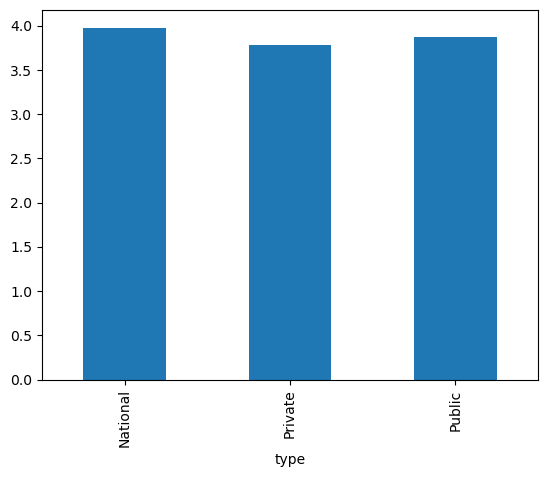

In [32]:
t = df.groupby(['type'])['review_rating'].mean()
t.plot(kind='bar')

Q2) Does experience help in achieving higher ranks?

<AxesSubplot:xlabel='found'>

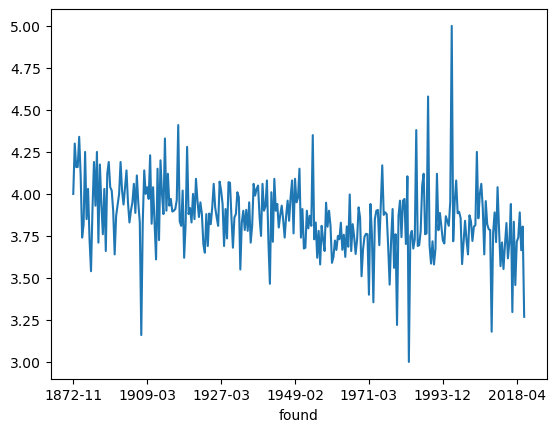

In [53]:
t = df.groupby(['found'])['review_rating'].mean()
t.plot(kind='line')

Q3) Does diversity of options increase in people choosing it more often?

<function matplotlib.pyplot.show(close=None, block=None)>

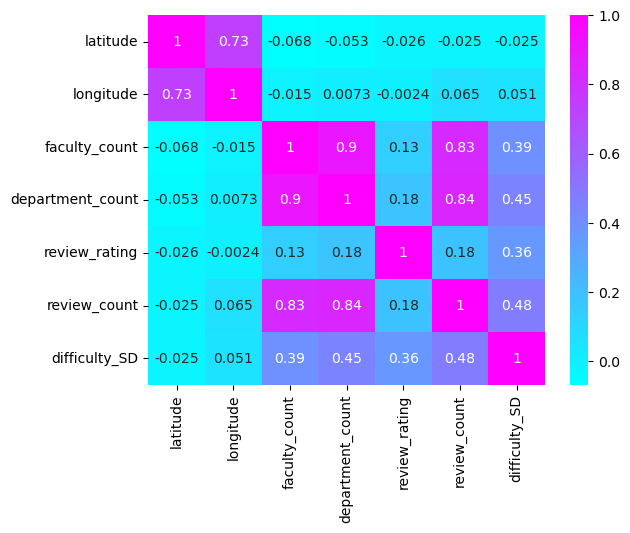

In [40]:
import seaborn as sns
df_corr_matrix = df.corr()
sns.heatmap(df_corr_matrix, cmap = 'cool', annot = True)
plt.show

Q4) What do people choose difficult or not difficult institutions?

In [41]:
df.groupby(['difficulty_rank'])['review_rating'].mean()

difficulty_rank
A    4.047083
B    3.975526
C    3.909492
D    3.847912
E    3.813942
F    3.733439
S    4.187000
Name: review_rating, dtype: float64

Q5) Is any state performing particularly well in quality of education being delivered?

<AxesSubplot:xlabel='state'>

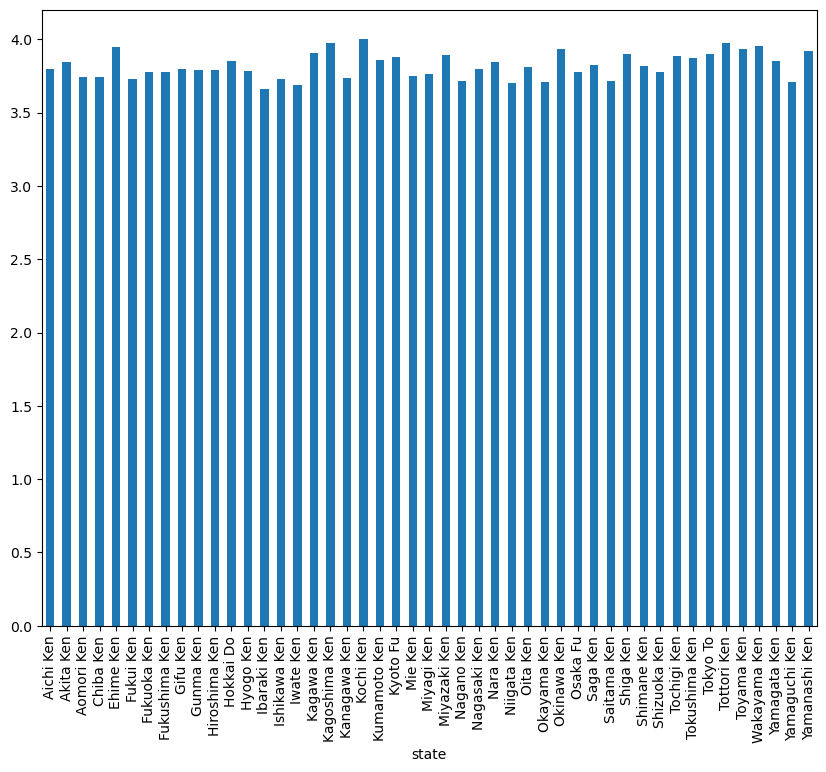

In [52]:
t = df.groupby(['state'])['review_rating'].mean()
t.plot(kind='bar', figsize = (10,8))